Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Mohammad Shadik Ansari | 12340306 | 13.11.2023, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 3 &ndash; Supervised Machine Learning Basics</h2>

<b>Authors:</b> Brandstetter, Rumetshofer, Parada-Cabaleiro, Schörgenhumer, Schäfl<br>
<b>Date:</b> 30-10-2023

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u3_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u3_utils.py</code> need to be installed.

A new package is used in this notebook: <code>tqdm</code>. Normally, this should already be installed because of the other packages you have already installed previously. If not, run <code>pip install tqdm</code> (or analogously for Anaconda).

In [39]:
# Required packages and the u3_utils file
import u3_utils as u3
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

import itertools

warnings.filterwarnings('ignore')
pd.options.display.width = 0
pd.options.display.max_colwidth = 100
u3.check_module_versions()

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u3.setup_jupyter()

Installed Python version: 3.10 (✓)
Installed numpy version: 1.26.0 (✓)
Installed pandas version: 2.1.1 (✓)
Installed scikit-learn version: 1.3.1 (✓)
Installed matplotlib version: 3.8.0 (✓)
Installed seaborn version: 0.13.0 (✓)


<h2>The Breast Cancer Dataset</h2>

Some exercises of this unit are based upon the breast cancer dataset (already introduced in Unit 1). To recapitulate, the "breast cancer wisconsin (diagnostic) dataset" is a binary classification task (malignant vs. benign) using 30-dimensional samples whose features were extracted from digitized images of a fine needle aspirate (FNA) of breast masses. For more details, see [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset).

<h2>Exercise 1</h2>

Given the function and datapoints (samples) defined below, perform the following task:

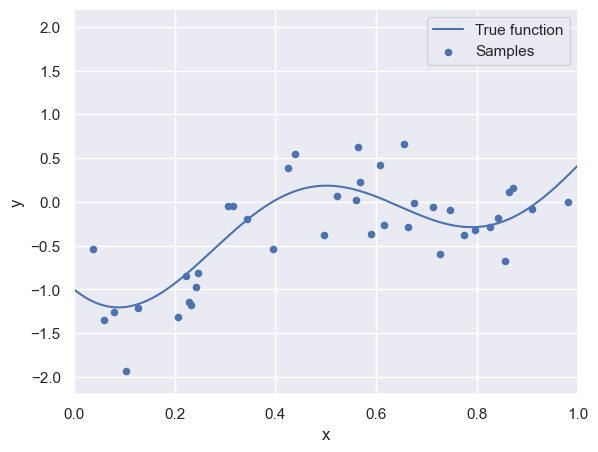

In [23]:
# function
def function(x):
    return np.sin(-1.5 * np.pi * x) - np.cos(2.3 * np.pi * x)

np.random.seed(1004)
n_samples = 40

# data points
x = np.random.rand(n_samples)
noise = np.random.randn(n_samples) * 0.33
y = function(x) + noise

# plot function with noise
u3.plot_function(x, y, function)

<div class="alert alert-warning">
    <b>Exercise 1.1. [5 Points]</b>
    <ul>
        <li>Try out polynomials of degrees 1, 2, 4, 10, 20 and 45. Choose the polynomial which best fits the data points (without overfitting) and plot it with the function <code>u3.plot_polynomial_fit</code>.</li>
        <li>Hint: You should plot <b>only</b> the polynomial which best fits the datapoints, i.e., report one plot (not all five).</li>
    </ul>
</div>

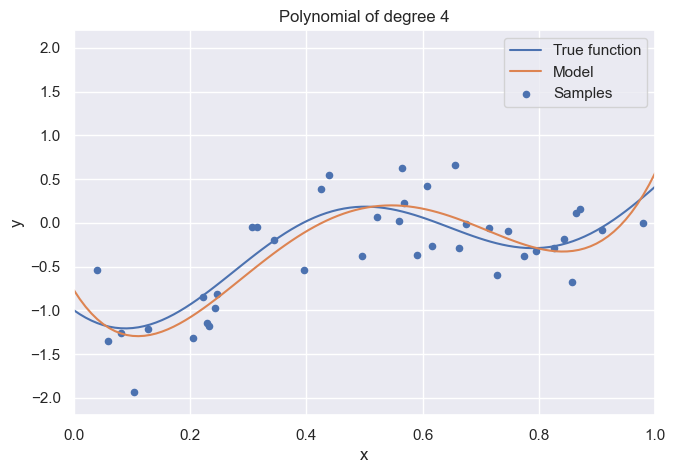

In [24]:
#degrees = [1,2, 4, 10, 20, 45]

degree = [4]
u3.plot_polynomial_fit(x, y, function, degree)

<h2>Exercise 2</h2>

Following the instructions given in the lecture notebook, but considering this time the breast cancer dataset, perform the tasks below:

<div class="alert alert-warning">
    <b>Exercise 2.1. [2 Points]</b>
    <ul>
        <li>Load the breast cancer dataset with the function <code>u3.load_breast_cancer</code> and display the data in tabular form.</li>
    </ul>
</div>

In [25]:
breast_cancer_data = u3.load_breast_cancer()
breast_cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<div class="alert alert-warning">
    <b>Exercise 2.2. [7 Points]</b>
    <ul>
        <li>Separate the features from the labels by creating two variables: <code>X</code> (for the features) and <code>y</code> (for the labels, i.e., the data of the column "diagnosis").</li>
        <li>Only use the first 10 features of the dataset. Store these 10 features into a variable called <code>feature_names</code> (analogously to the lecture notebook).</li>
        <li>Display/Print the feature names.</li>
        <li>Hint: To easily refer to the given feature names, a straightforward solution would be indicating the exact range of columns in the dataframe we are interested in (using <code>[:10]</code> similar to the <code>[:-1]</code> trick of the lecture). To be sure that you have selected the 10 features correctly (these should be all the ones starting with "mean ..."), before going ahead with the next tasks, printing the feature names is a good idea.</li>
    </ul>
</div>

In [26]:
feature_names = breast_cancer_data.columns[:10]
X = breast_cancer_data[feature_names]
y = breast_cancer_data['diagnosis']

print(feature_names)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],
      dtype='object')


<h2>Exercise 3</h2>

Taking into account the variables `X` and `y` as previously defined, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 3.1. [5 Points]</b>
    <ul>
        <li>Split the dataset (<code>X</code> and <code>y</code>) into training and test sets considering 68% of the data for training, 32% for test.</li>
        <li>For reproducibility, use <code>random_state=1004</code> when calling the function.</li>
    </ul>
</div>

In [27]:
# split X and y in train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=1004)

<div class="alert alert-warning">
    <b>Exercise 3.2. [5 Points]</b>
    <ul>
        <li>Plot the 10 features of the <b>training set</b> to visualize how they correlate (already defined in the second exercise) correlate.</li>
        <li>Which feature pair seems to strongly correlate for both diagonsis types?</li>
        <li>Hint: Plotting this many features might take some time. The plot output might be automatically reduced in size. If you double click on it, you can view the original plot size (in JupyterLab).</li>
    </ul>
</div>

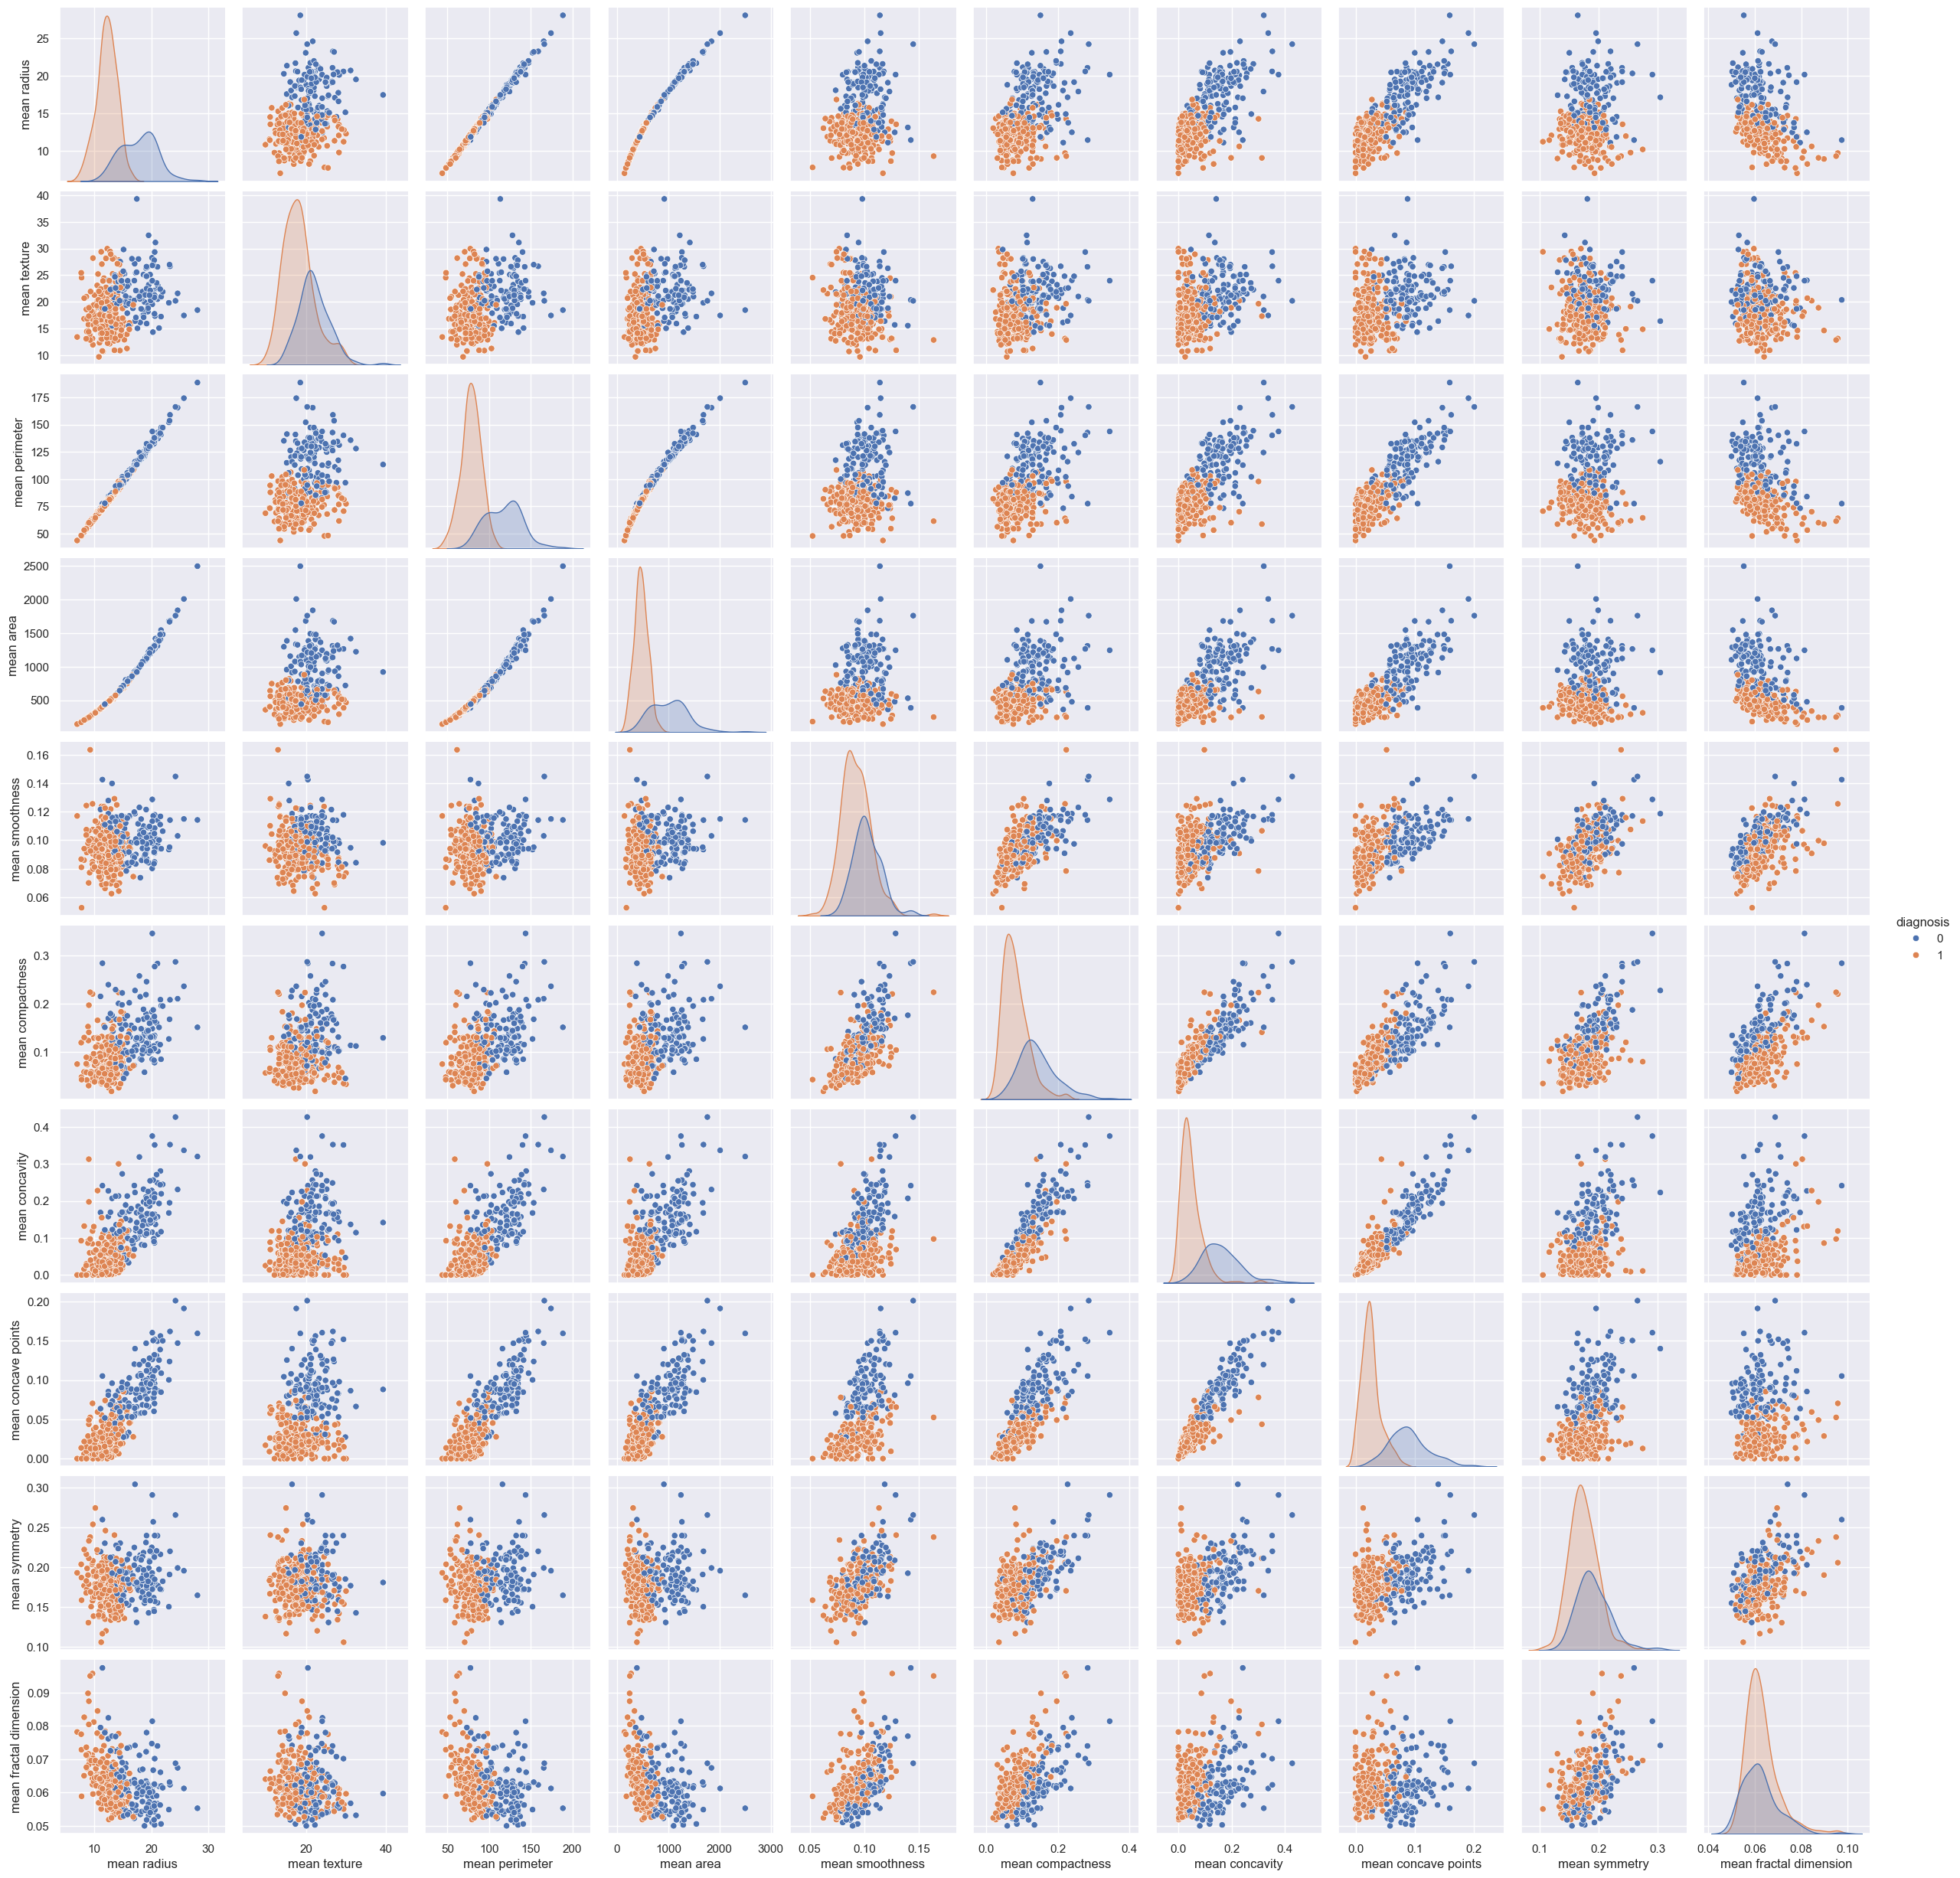

In [28]:
u3.plot_features(X=X_train, y=y_train, features=feature_names)

### Mean smoothness seems to correlate more for both diagnosis types as the area between intersection of diagnosis type 0 and 1 is highest for this feature.

<h2>Exercise 4</h2>

Considering the data split already performed (i.e., 68% for training, 32% for test), carry out the following tasks:

<div class="alert alert-warning">
    <b>Exercise 4.1. [5 Points]</b>
    <ul>
        <li>Select a subset of only two features: "mean compactness" and "mean smoothness".</li>
        <li>Hint: Remember that the feature selection should be applied to both the training and test sets, otherwise you might get some errors in the following tasks.</li>
    </ul>
</div>

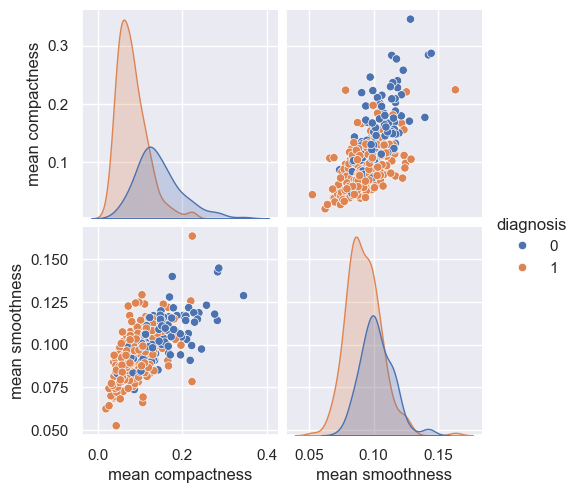

In [29]:
feature_names_subset = ["mean compactness", "mean smoothness"]
X = breast_cancer_data[feature_names_subset]
y = breast_cancer_data['diagnosis']

# split X and y in train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=1004)

u3.plot_features(X=X_train, y=y_train, features=feature_names_subset)

<div class="alert alert-warning">
    <b>Exercise 4.2. [5 Points]</b>
    <ul>
        <li>Taking into account only the previously selected features, fit a k-nn classifier considering $k=1$, $k=4$, $k=10$, $k=20$ and $k=70$.</li>
        <li>For each $k$, evaluate the accuracy on the test set.</li>
        <li>Choose the $k$ which achieves the highest accuracy on the <b>test set</b> and print out the model's accuracies for <b>both</b> the training and the test sets.</li>
        <li>Hint: In case of a draw, select the $k$ with the <b>highest training accuracy</b> among the ones with the <b>highest test accuracy</b>.</li>
    </ul>
</div>

In [30]:
feature_names_subset = ["mean compactness", "mean smoothness"]

X_train_subset = X_train[feature_names_subset]
X_test_subset = X_test[feature_names_subset]

# train the model
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_subset, y_train)

# use the trained model
print('Accuracy on training set: {:.4f}'.format(knn.score(X_train_subset, y_train)))
print('Accuracy on     test set: {:.4f}'.format(knn.score(X_test_subset, y_test)))

Accuracy on training set: 0.8161
Accuracy on     test set: 0.8087


<div class="alert alert-warning">
    <b>Exercise 4.3. [5 Points]</b>
    <ul>
        <li>Plot the decision boundaries of the k-nn considering the $k$ value previously chosen.</li>
    </ul>
</div>

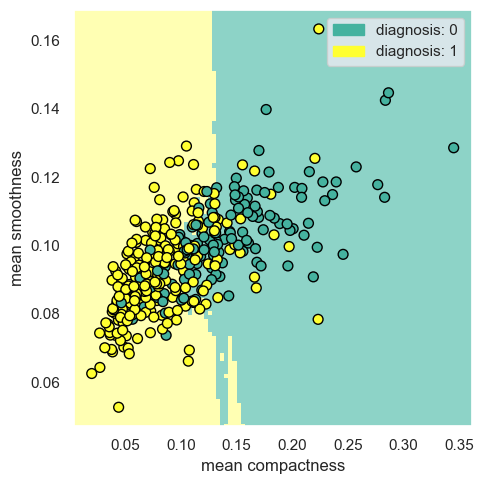

In [31]:
feature_names_subset = ["mean compactness", "mean smoothness"]
knn = KNeighborsClassifier(n_neighbors=20)
u3.plot_decision_boundaries(knn, X_train, y_train, feature_names_subset)

<h2>Exercise 5</h2>

We have collected a new sample of the breast cancer data which presents the following characteristics: 

- mean compactness $=0.2$ 
- mean smoothness $=0.08$

Your tasks are:

<div class="alert alert-warning">
    <b>Exercise 5.1. [5 Points]</b>
    <ul>
        <li>Keeping the same model characteristics and subset of features previously defined, predict (with the already fitted model) the type of diagnosis (either $0$ or $1$) to which this new sample belongs, and print the k-nn model's prediction.</li>
        <li>Hint: The <code>knn.predict</code> method expects a list of samples, so you have to wrap your single sample again in a list: <code>[sample]</code>.</li>
    </ul>
</div>

In [32]:
new_samples = [[ 0.2, 0.08]]
knn.fit(X_train_subset, y_train)

breast_cancer_predictions = knn.predict(new_samples)

print("The k-nearest neighbors classifier predicts classes {}".format(breast_cancer_predictions))

The k-nearest neighbors classifier predicts classes [0]


<div class="alert alert-warning">
    <b>Exercise 5.2. [5 Points]</b>
    <ul>
        <li>Imagine that it is you now who is collecting new data samples. Can you provide a sample (represented in terms of the previously indicated features, i.e., "mean compactness" and "mean smoothness") that belongs to the missing class?</li>
        <li>Prove that your sample is of a different diagnosis type than the one new provided sample above by printing out the prediction given by the k-nn model.</li>
    </ul>
</div>

In [33]:

#Let mean compactness=0.1 and mean smoothness = 0.1 and the sample is my_sample

my_sample = [[ 0.1, 0.1]]
knn.fit(X_train_subset, y_train)

breast_cancer_predictions = knn.predict(my_sample)

print("The k-nearest neighbors classifier predicts classes {}".format(breast_cancer_predictions))

The k-nearest neighbors classifier predicts classes [1]


<h2>Exercise 6</h2>

Since the two selected features might have influenced the performance of the model, in the following tasks, different feature combinations and $k$ values will be considered in order to find the configuration which achieves the best performance.

<div class="alert alert-warning">
    <b>Exercise 6.1. [7 Points]</b>
    <ul>
        <li>Keeping the same split and <code>random_state</code> as previously (32% of the samples for test; <code>random_state=1004</code>), use the function <code>u3.test_k_range()</code> to plot the accuracies obtained by the k-nn model considering every $k$ in an inclusive range from 1 to 30, i.e., <code>range(1, 31)</code>.</li>
        <li>Concerning the features for this task, consider only the same feature pair already used in the previous tasks, i.e., "mean compactness" and "mean smoothness".</li>
    </ul>
</div>

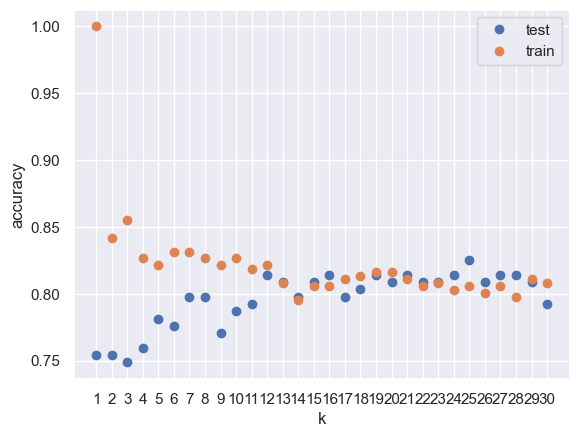

In [34]:
feature_names_subset = ["mean compactness", "mean smoothness"]

#X_train = X_train[feature_names_subset]
#X_test = X_test[feature_names_subset]


k_range = range(1, 31)  # creates a range of consecutive numbers starting from 2 up to 15 exclusive = [2, 3, ..., 13, 14]
u3.test_k_range(X_train, y_train, X_test, y_test, k_range )

<div class="alert alert-warning">
    <b>Exercise 6.2. [7 Points]</b>
    <ul>
        <li>Keeping the same model configuration, plot again the accuracies for the 30 different $k$, but now, considering different feature pairs (e.g., "mean texture" and "mean radius", "mean radius" and "mean concavity", etc.).</li>
        <li>Try to find a new feature pair which achieves at least the <b>same or a better performance</b> on the <b>test set</b> than the original feature pair from above.</li>
        <li>Hint: As your answer, you should plot <b>only</b> the results for this feature pair.</li>
        <li>Hint: More than one answer might be correct, meaning that you could find more than one feature pair. In this case, select the feature pair that has the highest test set accuracy with the lowest $k$.</li>
        <li>Hint: There is no need to be exactly precise with the test set accuracies, just look at the plots and approximate the accuracy values.</li>
    </ul>
</div>

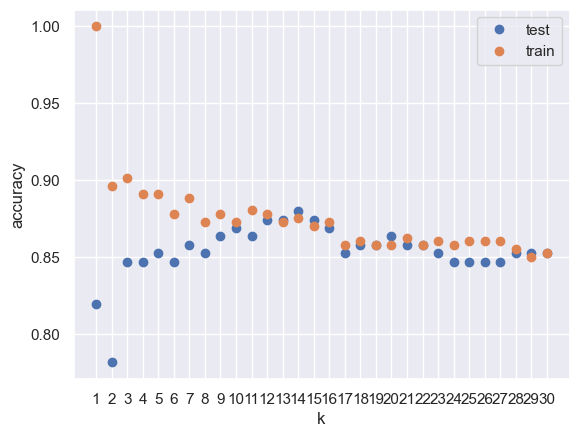

In [35]:

feature_names = ["mean compactness", "mean fractal dimension"]

X = breast_cancer_data[feature_names]

y = breast_cancer_data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=1004)

k_range = range(1, 31)  # creates a range of consecutive numbers starting from 1 up to 30 exclusive = [2, 3, ..., 29, 30]

u3.test_k_range(X_train, y_train, X_test, y_test, k_range )


<div class="alert alert-warning">
    <b>Exercise 6.3. [7 Points]</b>
    <ul>
        <li>Perform again the task just described, but this time evaluating also groups of > 2 features, i.e., plot the accuracies for the 30 different $k$ considering possible feature combinations containing <b>three or more features</b>, and choose the feature group which achieves a <b>better</b> performance on the <b>test set</b> than your new best feature pair from above.</li>
        <li>Hint: Again, There is no need to be exactly precise with the test set accuracies, just look at the plots and approximate the accuracy values. Also, there might be many different possible solutions (you can pick any).</li>
        <li>Hint: Start with adding a single additional feature to make a feature triple (this might already be sufficient).</li>
    </ul>
</div>

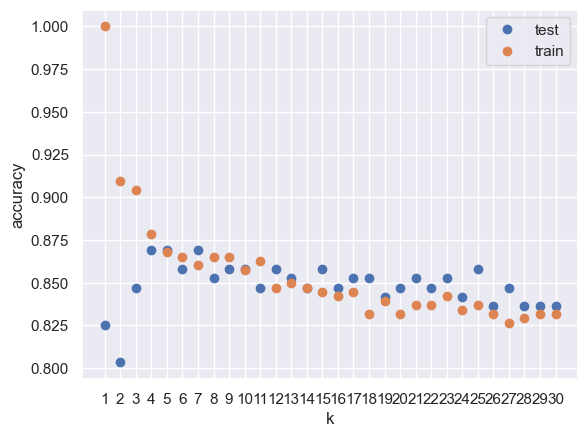

In [36]:

feature_names = ["mean compactness", "mean fractal dimension","mean symmetry"]


X = breast_cancer_data[feature_names]

y = breast_cancer_data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=1004)

k_range = range(1, 31)  # creates a range of consecutive numbers starting from 2 up to 15 exclusive = [2, 3, ..., 13, 14]

u3.test_k_range(X_train, y_train, X_test, y_test, k_range )

Since we have 10 features, looking for the feature group which yields the highest performance by testing each group manually is very tedious and time consuming. The following exercises aim to automate this process, but first, let us introduce the package `itertools`, which allows to automatically generate all the possible combinations between the elements of a list.

<h2>The ice-cream menu example</h2>

Imagine an ice-cream shop offering the following flavors:

- Vanilla
- Chocolate
- Strawberry
- Lemon

In order to satisfy every customer's wish, we want to provide an ice-cream menu containing all the possible varieties: from 1 flavor (lowest variety) to 4 flavors (highest variety), and all possible flavor combination within each variety. In the following, we will perform this by using the function `combinations` from the package `itertools`. Simply execute the cell below to see the results.

In [37]:
from itertools import combinations


# Define available flavors (for convenience, in lower case).
flavors = ['vanilla', 'chocolate', 'strawberry', 'lemon']

# We start by generating an empty menu.
icecream_menu = []

# Next, we loop through a range from 1 to 4 (inclusive) to consider all the possible varieties.
for variety in range(1, len(flavors) + 1):
    
    # - with combinations() we generate all the possible combinations given a specific variety (i.e., number of flavors)
    # - with map(list, ...) we turn each combination into a list
    # - with extend() we add to the menu the combinations (list of flavors) for each variety
    combs = list(map(list, combinations(flavors, variety)))
    icecream_menu.extend(combs)

# Finally, we print out each ice-cream from the menu.
for icecream in icecream_menu:
    print(icecream)

['vanilla']
['chocolate']
['strawberry']
['lemon']
['vanilla', 'chocolate']
['vanilla', 'strawberry']
['vanilla', 'lemon']
['chocolate', 'strawberry']
['chocolate', 'lemon']
['strawberry', 'lemon']
['vanilla', 'chocolate', 'strawberry']
['vanilla', 'chocolate', 'lemon']
['vanilla', 'strawberry', 'lemon']
['chocolate', 'strawberry', 'lemon']
['vanilla', 'chocolate', 'strawberry', 'lemon']


<h2>Exercise 7</h2>

Considering `combinations` and the code provided above, perform the tasks described below:

<div class="alert alert-warning">
    <b>Exercise 7.1. [10 Points]</b>
    <ul>
        <li>In the following, a simple solution whose purpose is to automatically find the feature pair that achieves the highest accuracy with the lowest $k$ is given. Since some parts of the code have been removed, in order to be able to run it, your task is to complete them.</li>
        <li>The following solution contains many explanatory comments aiming to describe the given code and guide you on its completion. To easily identify the missing code parts, these have been marked with asterisks as <code># ******************* #</code>.</li>
        <li>Hint: To correctly perform the feature combinations, you should take a look at the ice-cream menu example. Note that you will not need a loop over varieties in this first task, since only feature pairs will be considered (not triples, quadruples, etc.).</li>
    </ul>
</div>

In [43]:
from itertools import combinations

# Define the list of features.
features = feature_names

# Create the variable all_feature_pairs, which is a list containing all the possible feature pairs.
all_feature_pairs = list(itertools.combinations(features, 2))

# Split X and y in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38, random_state=42)

# Define range for the evaluated k as 'k_range'.
k_range = range(1, 11)  

# Create a list to collect the accuracies for each feature pair.
results = []

# Loop over the feature pairs.
for pair in all_feature_pairs:
    
    # Select a subset of features (for both train and test), i.e., a specific pair for each iteration of the loop.
    X_train_subset = X_train[list(pair)]
    X_test_subset = X_test[list(pair)]
    
    # Loop over the k range.
    for k in k_range: 
        
        # Define and fit the model with the number of neighbors k.
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_subset, y_train)
        score = knn.score(X_test_subset, y_test)
                
        # Add the evaluated feature pair, accuracy, and k as a tuple with 3 elements.
        results.append((pair, score, k))
    
# Convert the results (list of tuples) into a dataframe.
df = pd.DataFrame(results, columns=['feature pair', 'accuracy', 'k'])

# Filter the dataframe considering only the maximum accuracies.
df_max = df[df['accuracy'] == max(df['accuracy'])]

# Display the rows of the filtered dataframe whith the lowest k, (i.e., report the feature pairs which achieve the highest accuracy with the lowest k).
df_max[df_max['k'] == min(df_max['k'])]

,feature pair,accuracy,k
9,"(mean compactness, mean fractal dimension)",0.866359,10


<div class="alert alert-warning">
    <b>Exercise 7.2. [10 Points]</b>
    <ul>
        <li>Perform the previous task (i.e., find the feature combination which yields the best score with the lowest $k$) but considering now all the possible feature combinations with <b>at least two features</b>.</li>
        <li>Hint: Looking at the ice-cream example, pay attention when you indicate the range, since we want to consider only combinations with at least two features.</li>
        <li>Hint: You can copy the code from above and simply make changes where necessary.</li>
        <li>Hint: With 10 features, there are many possible combinations, so running the code cell might take some time.</li>
    </ul>
</div>

In [56]:
from itertools import combinations

# Define the list of features.
features = feature_names

# Create the variable all_feature_pairs, which is a list containing all the possible feature pairs.
all_possible_pairs=[]


"""Here is the code I modified"""
####All possible combinations with at least 2 features#####
for i in range(2, len(features)+1):
    all_feature_pairs = list(itertools.combinations(features, i))
    all_possible_pairs.extend(all_feature_pairs)


# Split X and y in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38, random_state=42)

# Define range for the evaluated k as 'k_range'.
k_range = range(1, 11)  

# Create a list to collect the accuracies for each feature pair.
results = []

# Loop over the feature pairs.
for pair in all_possible_pairs:
    
    # Select a subset of features (for both train and test), i.e., a specific pair for each iteration of the loop.
    X_train_subset = X_train[list(pair)]
    X_test_subset = X_test[list(pair)]
    
    # Loop over the k range.
    for k in k_range: 
        
        # Define and fit the model with the number of neighbors k.
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_subset, y_train)
        score = knn.score(X_test_subset, y_test)
                
        # Add the evaluated feature pair, accuracy, and k as a tuple with 3 elements.
        results.append((pair, score, k))
    
# Convert the results (list of tuples) into a dataframe.
df = pd.DataFrame(results, columns=['feature pair', 'accuracy', 'k'])

# Filter the dataframe considering only the maximum accuracies.
df_max = df[df['accuracy'] == max(df['accuracy'])]

# Display the rows of the filtered dataframe whith the lowest k, (i.e., report the feature pairs which achieve the highest accuracy with the lowest k).
df_max[df_max['k'] == min(df_max['k'])]

,feature pair,accuracy,k
9,"(mean compactness, mean fractal dimension)",0.866359,10


<h2>Exercise 8</h2>

By taking again into consideration the code from exercise 7, perform the following task:

<div class="alert alert-warning">
    <b>Exercise 8.1. [10 Points]</b>
    <ul>
        <li>Using the Random Forest classifier, retrieve the feature combination which yields the best score with the lowest number of estimators. Again, evaluate all the possible feature combinations with <b>at least two features</b> and optimize the number of estimators between 1 and 30 (inclusive).</li>
        <li>Hint: To enable reproducibility, set <code>random_state=1004</code> as a hyper-parameter of the classifier.</li>
        <li>Hint: You can copy the code from above and simply make changes where necessary.</li>
        <li>Hint: With 10 features, there are many possible combinations, so running the code cell might take some time.</li>
    </ul>
</div>

In [57]:
from itertools import combinations

# Define the list of features.
features = feature_names

# Create the variable all_possible_pairs, which is a list containing all the possible feature pairs.
all_possible_pairs=[]

"""Here is the code I modified"""
####All possible combinations with at least 2 features#####
for i in range(2, len(features)+1):
    all_feature_pairs = list(itertools.combinations(features, i))
    all_possible_pairs.extend(all_feature_pairs)


# Split X and y in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38, random_state=42)

# Define range for the evaluated k as 'k_range'.
k_range = range(1, 31)  

# Create a list to collect the accuracies for each feature pair.
results = []

# Loop over the feature pairs.
for pair in all_possible_pairs:
    
    # Select a subset of features (for both train and test), i.e., a specific pair for each iteration of the loop.
    X_train_subset = X_train[list(pair)]
    X_test_subset = X_test[list(pair)]
    
    # Loop over the k range.
    for k in k_range: 
        
        # Define and fit the model with the number of neighbors k.
        clf = RandomForestClassifier(n_estimators=k, random_state=1004)
        clf.fit(X_train_subset, y_train)
        score = clf.score(X_test_subset, y_test)
                
        # Add the evaluated feature pair, accuracy, and k as a tuple with 3 elements.
        results.append((pair, score, k))
    
# Convert the results (list of tuples) into a dataframe.
df = pd.DataFrame(results, columns=['feature pair', 'accuracy', 'k'])

# Filter the dataframe considering only the maximum accuracies.
df_max = df[df['accuracy'] == max(df['accuracy'])]

# Display the rows of the filtered dataframe whith the lowest k, (i.e., report the feature pairs which achieve the highest accuracy with the lowest k).
df_max[df_max['k'] == min(df_max['k'])]

,feature pair,accuracy,k
101,"(mean compactness, mean fractal dimension, mean symmetry)",0.894009,12
